In [1]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

In [3]:
#CNN에서 필요한 라이브버릴 
import numpy as np
import tensorflow as tf                                             #tensorflow 기본 import
from tensorflow.keras.models import Sequential                     # model box 구성
from tensorflow.keras.layers import Flatten, Dense   # model 안의 input layer와
                                                                    # output layer를 구성
from tensorflow.keras.optimizers import Adam,SGD ,RMSprop                        #알고리즘 담당
from sklearn.model_selection import train_test_split              # train Data, Test Data 분리
from sklearn.preprocessing import MinMaxScaler                    # 데이터 정규화 -> 컴퓨터가 큰숫자를 작은 숫자로 변경( 0~1사이 실수 값으로
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
from keras import backend
from keras.datasets import mnist

In [ ]:
from keras.datasets import mnist

In [4]:
(train_x_ori, train_y_ori), (test_x_ori, test_y_ori) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [12]:
train_x = train_x_ori / 255
test_x = test_x_ori / 255
train_x = train_x[:, :, :,np.newaxis,]
test_x = test_x[:, :, :, np.newaxis]

In [22]:
train_y = np_utils.to_categorical(train_y_ori, 10)
test_y = np_utils.to_categorical(test_y_ori, 10)

In [23]:
class LeNet : 
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        model.add(Conv2D(20, kernel_size = 5, padding="same", input_shape=input_shape))
        model.add(Activation("tanh"))
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Conv2D(50, kernel_size = 5, padding="same"))
        model.add(Activation("tanh"))
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("tanh"))
        model.add(Dense(10))
        model.add(Activation("sigmoid"))
        return model

In [19]:
model = LeNet.build(input_shape = (28, 28, 1), classes = 10)

In [8]:
for layer in model_base.layers[:-8]:
    layer.trainable=False
    

In [9]:
model.add(model_base)
#Fully Conection Layer(DNN)의 inpit layer
model.add(Flatten())#전체 데이터를 4차원에서 2차원으로 변경
# Hidden Layer
model.add(Dense(units=256,activation="relu"))

#ourput Layer
model.add(Dense(units=1,activation="sigmoid"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 15,076,865
Non-trainable params: 1,735,488
_________________________________________________________________


In [11]:
model_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [24]:
model.compile(loss = "categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [29]:
hist = model.fit(train_x, train_y, batch_size=256, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
188/188 [==============================] - 5s 25ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0366 - val_accuracy: 0.9906
Epoch 2/10
188/188 [==============================] - 7s 38ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0396 - val_accuracy: 0.9898
Epoch 3/10
188/188 [==============================] - 4s 23ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0499 - val_accuracy: 0.9870
Epoch 4/10
188/188 [==============================] - 4s 22ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0470 - val_accuracy: 0.9885
Epoch 5/10
188/188 [==============================] - 7s 39ms/step - loss: 0.0124 - accuracy: 0.9959 - val_loss: 0.0588 - val_accuracy: 0.9859
Epoch 6/10
188/188 [==============================] - 4s 23ms/step - loss: 0.0082 - accuracy: 0.9972 - val_loss: 0.0500 - val_accuracy: 0.9883
Epoch 7/10
188/188 [==============================] - 5s 25ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0427 - val_accuracy: 0.9896

In [26]:
score = model.evaluate(test_x, test_y, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0313 - accuracy: 0.9910


In [27]:
print("최종 정확도 : " + str( score[1] * 100 ) + " %" )

최종 정확도 : 99.09999966621399 %


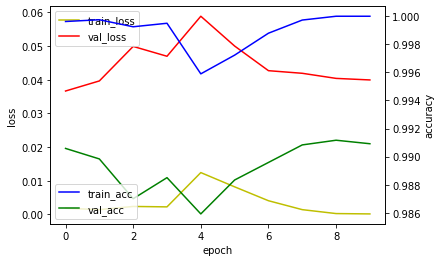

In [30]:
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history["loss"], "y", label="train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")